In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import data_processing
import math
import ipympl
from scipy import stats
from numpy import NaN
from matplotlib.pyplot import box
from sklearn.linear_model import LinearRegression


In [2]:
NUM_SAMPLES_BUFFER = 600
FILTER_AFTER_N = 200
BP_LOW_CUTOFF = 20
BP_HIGH_CUTOFF = 500
ORDER = 2
LP_HIGH_CUTOFF = 5

Mvc = 312.23
percent_mvc = 0.2
mvc_threshold = percent_mvc*Mvc

In [3]:
%matplotlib widget

In [4]:
data1_haptics = np.loadtxt("Kriti/raw_data_20220822-110743")
data2_haptics = np.loadtxt("Kriti/raw_data_20220822-111833")
data3_haptics = np.loadtxt("Kriti/raw_data_20220822-112401")
data4_haptics = np.loadtxt("Kriti/raw_data_20220822-112953")
data5_haptics = np.loadtxt("Kriti/raw_data_20220822-113313")
data6_haptics = np.loadtxt("Kriti/raw_data_20220822-113940")
data7_haptics = np.loadtxt("Kriti/raw_data_20220822-114535")
data8_haptics = np.loadtxt("Kriti/raw_data_20220822-115450")
data9_haptics = np.loadtxt("Kriti/raw_data_20220822-120128")

data_timestamps1_haptics = np.loadtxt("Kriti/timestamp_data_20220822-110743")
data_timestamps2_haptics = np.loadtxt("Kriti/timestamp_data_20220822-111833")
data_timestamps3_haptics = np.loadtxt("Kriti/timestamp_data_20220822-112401")
data_timestamps4_haptics = np.loadtxt("Kriti/timestamp_data_20220822-112953")
data_timestamps5_haptics = np.loadtxt("Kriti/timestamp_data_20220822-113313")
data_timestamps6_haptics = np.loadtxt("Kriti/timestamp_data_20220822-113940")
data_timestamps7_haptics = np.loadtxt("Kriti/timestamp_data_20220822-114535")
data_timestamps8_haptics = np.loadtxt("Kriti/timestamp_data_20220822-115450")
data_timestamps9_haptics = np.loadtxt("Kriti/timestamp_data_20220822-120128")

data_crossed1_haptics = np.loadtxt("Kriti/timestamp_crossed_data_20220822-110743")
data_crossed2_haptics = np.loadtxt("Kriti/timestamp_crossed_data_20220822-111833")
data_crossed3_haptics = np.loadtxt("Kriti/timestamp_crossed_data_20220822-112401")
data_crossed4_haptics = np.loadtxt("Kriti/timestamp_crossed_data_20220822-112953")
data_crossed5_haptics = np.loadtxt("Kriti/timestamp_crossed_data_20220822-113313")
data_crossed6_haptics = np.loadtxt("Kriti/timestamp_crossed_data_20220822-113940")
data_crossed7_haptics = np.loadtxt("Kriti/timestamp_crossed_data_20220822-114535")
data_crossed8_haptics = np.loadtxt("Kriti/timestamp_crossed_data_20220822-115450")
data_crossed9_haptics = np.loadtxt("Kriti/timestamp_crossed_data_20220822-120128")

gui_data1_haptics = np.load("Kriti/combo_info_20220822-110733.npz")
gui_data2_haptics = np.load("Kriti/combo_info_20220822-111829.npz")
gui_data3_haptics = np.load("Kriti/combo_info_20220822-112354.npz")
gui_data4_haptics = np.load("Kriti/combo_info_20220822-112948.npz")
gui_data5_haptics = np.load("Kriti/combo_info_20220822-113306.npz")
gui_data6_haptics = np.load("Kriti/combo_info_20220822-113933.npz")
gui_data7_haptics = np.load("Kriti/combo_info_20220822-114529.npz")
gui_data8_haptics = np.load("Kriti/combo_info_20220822-115445.npz")
gui_data9_haptics = np.load("Kriti/combo_info_20220822-120123.npz")


In [5]:
data1_wo = np.loadtxt("Kriti/raw_data_20220822-111110")
data2_wo = np.loadtxt("Kriti/raw_data_20220822-111436")
data3_wo = np.loadtxt("Kriti/raw_data_20220822-112119")
data4_wo = np.loadtxt("Kriti/raw_data_20220822-112644")
data5_wo = np.loadtxt("Kriti/raw_data_20220822-113546")
data6_wo = np.loadtxt("Kriti/raw_data_20220822-114229")
data7_wo = np.loadtxt("Kriti/raw_data_20220822-114905")
data8_wo = np.loadtxt("Kriti/raw_data_20220822-115149")
data9_wo = np.loadtxt("Kriti/raw_data_20220822-115838")

data_timestamps1_wo = np.loadtxt("Kriti/timestamp_data_20220822-111110")
data_timestamps2_wo = np.loadtxt("Kriti/timestamp_data_20220822-111436")
data_timestamps3_wo = np.loadtxt("Kriti/timestamp_data_20220822-112119")
data_timestamps4_wo = np.loadtxt("Kriti/timestamp_data_20220822-112644")
data_timestamps5_wo = np.loadtxt("Kriti/timestamp_data_20220822-113546")
data_timestamps6_wo = np.loadtxt("Kriti/timestamp_data_20220822-114229")
data_timestamps7_wo = np.loadtxt("Kriti/timestamp_data_20220822-114905")
data_timestamps8_wo = np.loadtxt("Kriti/timestamp_data_20220822-115149")
data_timestamps9_wo = np.loadtxt("Kriti/timestamp_data_20220822-115838")

data_crossed1_wo = np.loadtxt("Kriti/timestamp_crossed_data_20220822-111110")
data_crossed2_wo = np.loadtxt("Kriti/timestamp_crossed_data_20220822-111436")
data_crossed3_wo = np.loadtxt("Kriti/timestamp_crossed_data_20220822-112119")
data_crossed4_wo = np.loadtxt("Kriti/timestamp_crossed_data_20220822-112644")
data_crossed5_wo = np.loadtxt("Kriti/timestamp_crossed_data_20220822-113546")
data_crossed6_wo = np.loadtxt("Kriti/timestamp_crossed_data_20220822-114229")
data_crossed7_wo = np.loadtxt("Kriti/timestamp_crossed_data_20220822-114905")
data_crossed8_wo = np.loadtxt("Kriti/timestamp_crossed_data_20220822-115149")
data_crossed9_wo = np.loadtxt("Kriti/timestamp_crossed_data_20220822-115838")

gui_data1_wo = np.load("Kriti/combo_info_20220822-111107.npz")
gui_data2_wo = np.load("Kriti/combo_info_20220822-111430.npz")
gui_data3_wo = np.load("Kriti/combo_info_20220822-112113.npz")
gui_data4_wo = np.load("Kriti/combo_info_20220822-112638.npz")
gui_data5_wo = np.load("Kriti/combo_info_20220822-113542.npz")
gui_data6_wo = np.load("Kriti/combo_info_20220822-114221.npz")
gui_data7_wo = np.load("Kriti/combo_info_20220822-114826.npz")
gui_data8_wo = np.load("Kriti/combo_info_20220822-115144.npz")
gui_data9_wo = np.load("Kriti/combo_info_20220822-115834.npz")

In [ ]:
gui_combos_haptics = np.concatenate((gui_data1_haptics['combos'], gui_data2_haptics['combos'], gui_data3_haptics['combos'], gui_data4_haptics['combos'], gui_data5_haptics['combos'], gui_data6_haptics['combos'], gui_data7_haptics['combos'], gui_data8_haptics['combos'], gui_data9_haptics['combos']), axis=0)
gui_reps_haptics = gui_data1_haptics['reps']

print("repitions:", gui_reps_haptics)
print('Wt/Dt combos:', gui_combos_haptics)
np.savetxt('kriti_gui_combos_haptics.txt', gui_combos_haptics)


ID_haptics = np.log2(gui_combos_haptics[:,1]/gui_combos_haptics[:,0])
print("ID:",ID_haptics)

repitions: 25
Wt/Dt combos: [[ 150 1600]
 [ 150 1000]
 [ 150 2200]
 [ 230 1600]
 [ 230 1000]
 [ 230 2200]
 [  60 1600]
 [  60 2200]
 [  60 1000]
 [ 150 2200]
 [ 150 1000]
 [ 150 1600]
 [ 230 1600]
 [ 230 2200]
 [ 230 1000]
 [  60 1000]
 [  60 1600]
 [  60 2200]
 [ 150 1600]
 [ 150 1000]
 [ 150 2200]
 [ 230 1600]
 [ 230 2200]
 [ 230 1000]
 [  60 1600]
 [  60 2200]
 [  60 1000]]
ID: [3.4150375  2.73696559 3.87446912 2.79836614 2.12029423 3.25779776
 4.73696559 5.19639721 4.05889369 3.87446912 2.73696559 3.4150375
 2.79836614 3.25779776 2.12029423 4.05889369 4.73696559 5.19639721
 3.4150375  2.73696559 3.87446912 2.79836614 3.25779776 2.12029423
 4.73696559 5.19639721 4.05889369]


In [ ]:
gui_combos_wo = np.concatenate((gui_data1_wo['combos'], gui_data2_wo['combos'], gui_data3_wo['combos'],gui_data4_wo['combos'], gui_data5_wo['combos'], gui_data6_wo['combos'],gui_data7_wo['combos'], gui_data8_wo['combos'], gui_data9_wo['combos']), axis=0)
gui_reps_wo = gui_data1_wo['reps']

print("repitions:", gui_reps_wo)
print('Wt/Dt combos:', gui_combos_wo)
np.savetxt('kriti_gui_combos_wo.txt', gui_combos_wo)

ID_wo = np.log2(gui_combos_wo[:,1]/gui_combos_wo[:,0])
print("ID:",ID_wo)

In [8]:
def remove_trailing_zeros(data, data_timestamps, data_crossed):
    data_new = data[~(data == 0).all(axis=1)]
    timestamp_data_new = data_timestamps[~(data == 0).all(axis=1)]
    data_crossed_new = data_crossed[~(data_crossed == 0)]
    return data_new, timestamp_data_new, data_crossed_new

def zero_runs(a):
    if a[-1] == 0:
        a = np.append(a, 1)
    if a[0] == 0:
        a = np.append(1, a)
    iszero = np.equal(a, 0).view(np.int8)
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges

# remove the power cycling
def remove_long_runs(runs, data):
    runs_lengths = runs[:,1] - runs[:,0]

    for idx, length in enumerate(runs_lengths):
        if length > 1000: # must be larger than the largest target - which is 230 ms * 4
            data[runs[idx,0]-1:runs[idx,1]+1] = 1 

    return data 

In [9]:

# a = np.append(data5_haptics[:, 4], 1)
# iszero = np.equal(a, 0).view(np.int8)
# print(a)
# print(iszero)
# absdiff = np.abs(np.diff(iszero))
# print(np.where(absdiff == 1)[0])
# # Runs start and end where absdiff is 1.
# ranges = np.where(absdiff == 1)[0].reshape(-1, 2)

In [10]:
np.argwhere(data_timestamps5_haptics < -520000)

array([], shape=(0, 1), dtype=int64)

In [11]:
data1_haptics, data_timestamps1_haptics, data_crossed1_haptics  = remove_trailing_zeros(data1_haptics, data_timestamps1_haptics, data_crossed1_haptics)
data2_haptics, data_timestamps2_haptics, data_crossed2_haptics  = remove_trailing_zeros(data2_haptics, data_timestamps2_haptics, data_crossed2_haptics)
data3_haptics, data_timestamps3_haptics, data_crossed3_haptics  = remove_trailing_zeros(data3_haptics, data_timestamps3_haptics, data_crossed3_haptics)
data4_haptics, data_timestamps4_haptics, data_crossed4_haptics  = remove_trailing_zeros(data4_haptics, data_timestamps4_haptics, data_crossed4_haptics)
data5_haptics, data_timestamps5_haptics, data_crossed5_haptics  = remove_trailing_zeros(data5_haptics, data_timestamps5_haptics, data_crossed5_haptics)
data6_haptics, data_timestamps6_haptics, data_crossed6_haptics  = remove_trailing_zeros(data6_haptics, data_timestamps6_haptics, data_crossed6_haptics)
data7_haptics, data_timestamps7_haptics, data_crossed7_haptics  = remove_trailing_zeros(data7_haptics, data_timestamps7_haptics, data_crossed7_haptics)
data8_haptics, data_timestamps8_haptics, data_crossed8_haptics  = remove_trailing_zeros(data8_haptics, data_timestamps8_haptics, data_crossed8_haptics)
data9_haptics, data_timestamps9_haptics, data_crossed9_haptics  = remove_trailing_zeros(data9_haptics, data_timestamps9_haptics, data_crossed9_haptics)

# data_timestamps2_haptics = data_timestamps2_haptics[:-2]
# data2_haptics = data2_haptics[:-2]

data_timestamps5_haptics = data_timestamps5_haptics[:522999]
data5_haptics = data5_haptics[:522999]

# data_timestamps9_haptics = data_timestamps9_haptics[:535200]
# data9_haptics = data9_haptics[:535200]

data_crossed1_haptics = data_crossed1_haptics - data_timestamps1_haptics[0]
data_timestamps1_haptics = data_timestamps1_haptics - data_timestamps1_haptics[0]

data_crossed2_haptics = data_crossed2_haptics - data_timestamps2_haptics[0] + data_timestamps1_haptics[-1]
data_timestamps2_haptics = data_timestamps2_haptics - data_timestamps2_haptics[0] + data_timestamps1_haptics[-1]


data_crossed3_haptics = data_crossed3_haptics - data_timestamps3_haptics[0] + data_timestamps2_haptics[-1]
data_timestamps3_haptics = data_timestamps3_haptics - data_timestamps3_haptics[0] + data_timestamps2_haptics[-1]

data_crossed4_haptics = data_crossed4_haptics - data_timestamps4_haptics[0] + data_timestamps3_haptics[-1]
data_timestamps4_haptics = data_timestamps4_haptics - data_timestamps4_haptics[0] + data_timestamps3_haptics[-1]

data_crossed5_haptics = data_crossed5_haptics - data_timestamps5_haptics[0] + data_timestamps4_haptics[-1]
data_timestamps5_haptics = data_timestamps5_haptics - data_timestamps5_haptics[0] + data_timestamps4_haptics[-1]

data_crossed6_haptics = data_crossed6_haptics - data_timestamps6_haptics[0] + data_timestamps5_haptics[-1]
data_timestamps6_haptics = data_timestamps6_haptics - data_timestamps6_haptics[0] + data_timestamps5_haptics[-1]

data_crossed7_haptics = data_crossed7_haptics - data_timestamps7_haptics[0] + data_timestamps6_haptics[-1]
data_timestamps7_haptics = data_timestamps7_haptics - data_timestamps7_haptics[0] + data_timestamps6_haptics[-1]

data_crossed8_haptics = data_crossed8_haptics - data_timestamps8_haptics[0] + data_timestamps7_haptics[-1]
data_timestamps8_haptics = data_timestamps8_haptics - data_timestamps8_haptics[0] + data_timestamps7_haptics[-1]

data_crossed9_haptics = data_crossed9_haptics - data_timestamps9_haptics[0] + data_timestamps8_haptics[-1]
data_timestamps9_haptics = data_timestamps9_haptics - data_timestamps9_haptics[0] + data_timestamps8_haptics[-1]



data1_haptics[:, 4] = remove_long_runs(zero_runs(data1_haptics[:, 4]), data1_haptics[:, 4])
data2_haptics[:, 4] = remove_long_runs(zero_runs(data2_haptics[:, 4]), data2_haptics[:, 4])
data3_haptics[:, 4] = remove_long_runs(zero_runs(data3_haptics[:, 4]), data3_haptics[:, 4])
data4_haptics[:, 4] = remove_long_runs(zero_runs(data4_haptics[:, 4]), data4_haptics[:, 4])
data5_haptics[:, 4] = remove_long_runs(zero_runs(data5_haptics[:, 4]), data5_haptics[:, 4])
data6_haptics[:, 4] = remove_long_runs(zero_runs(data6_haptics[:, 4]), data6_haptics[:, 4])
data7_haptics[:, 4] = remove_long_runs(zero_runs(data7_haptics[:, 4]), data7_haptics[:, 4])
data8_haptics[:, 4] = remove_long_runs(zero_runs(data8_haptics[:, 4]), data8_haptics[:, 4])
data9_haptics[:, 4] = remove_long_runs(zero_runs(data9_haptics[:, 4]), data9_haptics[:, 4])

data_crossed_haptics = np.concatenate((data_crossed1_haptics, data_crossed2_haptics, data_crossed3_haptics,data_crossed4_haptics, data_crossed5_haptics, data_crossed6_haptics,data_crossed7_haptics, data_crossed8_haptics, data_crossed9_haptics), axis = 0)
data_timestamps_haptics = np.concatenate((data_timestamps1_haptics, data_timestamps2_haptics, data_timestamps3_haptics,data_timestamps4_haptics, data_timestamps5_haptics, data_timestamps6_haptics, data_timestamps7_haptics, data_timestamps8_haptics, data_timestamps9_haptics), axis=0)
data_haptics = np.concatenate((data1_haptics, data2_haptics, data3_haptics, data4_haptics, data5_haptics, data6_haptics, data7_haptics, data8_haptics, data9_haptics), axis=0)

In [12]:
data1_wo, data_timestamps1_wo, data_crossed1_wo  = remove_trailing_zeros(data1_wo, data_timestamps1_wo, data_crossed1_wo)
data2_wo, data_timestamps2_wo, data_crossed2_wo  = remove_trailing_zeros(data2_wo, data_timestamps2_wo, data_crossed2_wo)
data3_wo, data_timestamps3_wo, data_crossed3_wo  = remove_trailing_zeros(data3_wo, data_timestamps3_wo, data_crossed3_wo)
data4_wo, data_timestamps4_wo, data_crossed4_wo  = remove_trailing_zeros(data4_wo, data_timestamps4_wo, data_crossed4_wo)
data5_wo, data_timestamps5_wo, data_crossed5_wo  = remove_trailing_zeros(data5_wo, data_timestamps5_wo, data_crossed5_wo)
data6_wo, data_timestamps6_wo, data_crossed6_wo  = remove_trailing_zeros(data6_wo, data_timestamps6_wo, data_crossed6_wo)
data7_wo, data_timestamps7_wo, data_crossed7_wo  = remove_trailing_zeros(data7_wo, data_timestamps7_wo, data_crossed7_wo)
data8_wo, data_timestamps8_wo, data_crossed8_wo  = remove_trailing_zeros(data8_wo, data_timestamps8_wo, data_crossed8_wo)
data9_wo, data_timestamps9_wo, data_crossed9_wo  = remove_trailing_zeros(data9_wo, data_timestamps9_wo, data_crossed9_wo)


data_crossed1_wo = data_crossed1_wo - data_timestamps1_wo[0]
data_timestamps1_wo = data_timestamps1_wo - data_timestamps1_wo[0]

data_crossed2_wo = data_crossed2_wo - data_timestamps2_wo[0] + data_timestamps1_wo[-1]
data_timestamps2_wo = data_timestamps2_wo - data_timestamps2_wo[0] + data_timestamps1_wo[-1]

data_crossed3_wo = data_crossed3_wo - data_timestamps3_wo[0] + data_timestamps2_wo[-1]
data_timestamps3_wo = data_timestamps3_wo - data_timestamps3_wo[0] + data_timestamps2_wo[-1]

data_crossed4_wo = data_crossed4_wo - data_timestamps4_wo[0] + data_timestamps3_wo[-1]
data_timestamps4_wo = data_timestamps4_wo - data_timestamps4_wo[0] + data_timestamps3_wo[-1]

data_crossed5_wo = data_crossed5_wo - data_timestamps5_wo[0] + data_timestamps4_wo[-1]
data_timestamps5_wo = data_timestamps5_wo - data_timestamps5_wo[0] + data_timestamps4_wo[-1]

data_crossed6_wo = data_crossed6_wo - data_timestamps6_wo[0] + data_timestamps5_wo[-1]
data_timestamps6_wo = data_timestamps6_wo - data_timestamps6_wo[0] + data_timestamps5_wo[-1]

data_crossed7_wo = data_crossed7_wo - data_timestamps7_wo[0] + data_timestamps6_wo[-1]
data_timestamps7_wo = data_timestamps7_wo - data_timestamps7_wo[0] + data_timestamps6_wo[-1]

data_crossed8_wo = data_crossed8_wo - data_timestamps8_wo[0] + data_timestamps7_wo[-1]
data_timestamps8_wo = data_timestamps8_wo - data_timestamps8_wo[0] + data_timestamps7_wo[-1]

data_crossed9_wo = data_crossed9_wo - data_timestamps9_wo[0] + data_timestamps8_wo[-1]
data_timestamps9_wo = data_timestamps9_wo - data_timestamps9_wo[0] + data_timestamps8_wo[-1]

data1_wo[:, 4] = remove_long_runs(zero_runs(data1_wo[:, 4]), data1_wo[:, 4])
data2_wo[:, 4] = remove_long_runs(zero_runs(data2_wo[:, 4]), data2_wo[:, 4])
data3_wo[:, 4] = remove_long_runs(zero_runs(data3_wo[:, 4]), data3_wo[:, 4])
data4_wo[:, 4] = remove_long_runs(zero_runs(data4_wo[:, 4]), data4_wo[:, 4])
data5_wo[:, 4] = remove_long_runs(zero_runs(data5_wo[:, 4]), data5_wo[:, 4])
data6_wo[:, 4] = remove_long_runs(zero_runs(data6_wo[:, 4]), data6_wo[:, 4])
data7_wo[:, 4] = remove_long_runs(zero_runs(data7_wo[:, 4]), data7_wo[:, 4])
data8_wo[:, 4] = remove_long_runs(zero_runs(data8_wo[:, 4]), data8_wo[:, 4])
data9_wo[:, 4] = remove_long_runs(zero_runs(data9_wo[:, 4]), data9_wo[:, 4])

data_crossed_wo = np.concatenate((data_crossed1_wo, data_crossed2_wo, data_crossed3_wo, data_crossed4_wo, data_crossed5_wo, data_crossed6_wo, data_crossed7_wo, data_crossed8_wo, data_crossed9_wo), axis = 0)
data_timestamps_wo = np.concatenate((data_timestamps1_wo, data_timestamps2_wo, data_timestamps3_wo, data_timestamps4_wo, data_timestamps5_wo, data_timestamps6_wo, data_timestamps7_wo, data_timestamps8_wo, data_timestamps9_wo), axis=0)
data_wo = np.concatenate((data1_wo, data2_wo, data3_wo, data4_wo, data5_wo, data6_wo, data7_wo, data8_wo, data9_wo), axis=0)

Text(0.5, 1.0, 'EMG - Haptics ')

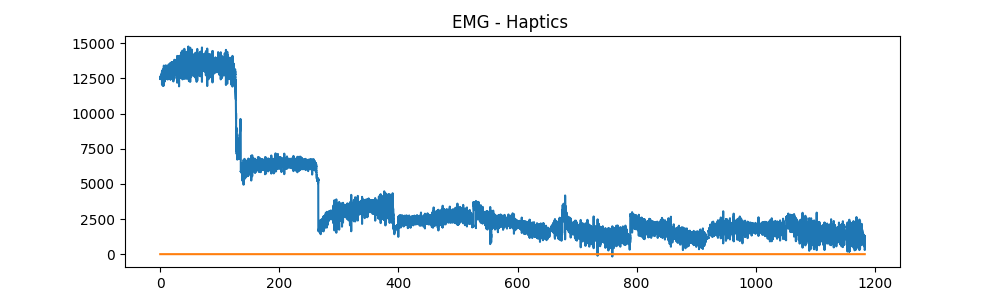

In [13]:
fig, axs = plt.subplots(1, figsize=(10, 3), sharex=True) # dont need status or lsl clock
# fig.suptitle('Data Flow')

plt.plot(data_timestamps_haptics, data_haptics[:, 0])
plt.plot(data_timestamps_haptics, data_haptics[:, 4])
plt.title('EMG - Haptics ')

In [14]:
data_wo[2098600:2107500, 4] = 1

Text(0.5, 1.0, 'EMG - None')

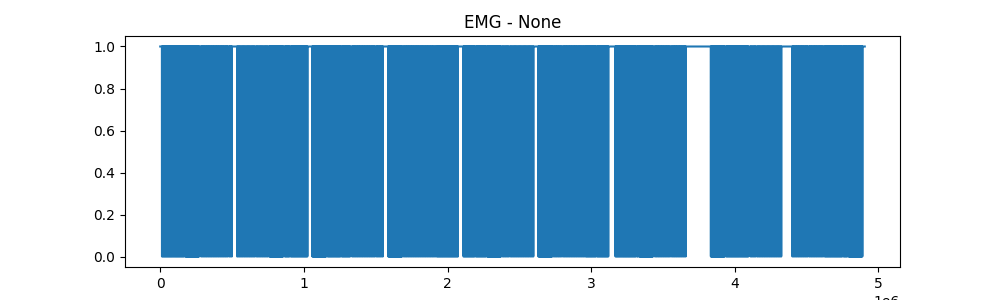

In [15]:
fig, axs = plt.subplots(1, figsize=(10, 3), sharex=True) # dont need status or lsl clock
# fig.suptitle('Data Flow')

# plt.plot(data_timestamps_wo, data_wo[:, 0])
plt.plot(data_wo[:, 4])
plt.title('EMG - None')

In [16]:
process_haptics = data_processing.postProcessData(4000, data_haptics[:,0])
process_haptics.processAll(BP_LOW_CUTOFF, BP_HIGH_CUTOFF, LP_HIGH_CUTOFF, ORDER, FILTER_AFTER_N)

process_wo = data_processing.postProcessData(4000, data_wo[:,0])
process_wo.processAll(BP_LOW_CUTOFF, BP_HIGH_CUTOFF, LP_HIGH_CUTOFF, ORDER, FILTER_AFTER_N)

In [17]:
def findThresholdCrossing(lpData, threshold):
    threshold_crossings = np.diff(lpData > threshold, prepend=False)
    positive_difference = np.diff(lpData, prepend=0) >= 0 
    threshold_crossings_positive = np.argwhere(np.logical_and(threshold_crossings, positive_difference))[:,0]
    return threshold_crossings_positive

def thresholdCrossed(lpData, threshold):
    threshold_crossings = np.diff(lpData > threshold)
    print("function crossing", threshold_crossings)
    positive_difference = np.diff(lpData) > 0    
    print("funciton difference", positive_difference) 
    thresholdCrossed =  np.any(np.logical_and(threshold_crossings, positive_difference))
    return thresholdCrossed

In [44]:


threshold_crossings_up_haptics = findThresholdCrossing(process_haptics.lpFilteredData, mvc_threshold)
threshold_crossings_up_wo = findThresholdCrossing(process_wo.lpFilteredData, mvc_threshold)

# Haptics 
stop_cue_haptics = (np.where(np.diff(data_haptics[:, 4]) == 1)[0])
start_cue_haptics = (np.where(np.diff(data_haptics[:, 4]) == -1)[0])

if stop_cue_haptics[0] < start_cue_haptics[0]:
    stop_cue_haptics = stop_cue_haptics[1:]

# NOne
stop_cue_wo = (np.where(np.diff(data_wo[:, 4]) == 1)[0])
start_cue_wo = (np.where(np.diff(data_wo[:, 4]) == -1)[0])

if stop_cue_wo[0] < start_cue_wo[0]:
    stop_cue_wo = stop_cue_wo[1:]

print("threshold corssing:", threshold_crossings_up_haptics)
print("start:", start_cue_haptics)
print("stop:", stop_cue_haptics)

threshold corssing: [  11601   17504   24042   30533   36652   43123   49447   55765   62088
   68171   75068   81434   87815   94090  100645  106954  113549  119716
  126000  129683  135732  141970  144022  148734  154900  161581  168012
  176439  180070  184112  188366  191866  196272  198043  200334  204257
  205878  208291  212038  216324  221490  224155  228099  232325  236331
  240469  244324  248272  250391  252515  256659  260634  264295  267657
  268191  272278  279916  282915  288861  297773  299371  304771  307789
  315156  317565  323805  332967  341628  350539  359312  361877  370367
  379547  388560  397028  399096  405907  414644  423611  432440  441129
  449650  458076  467323  476253  485044  493754  509325  510635  515443
  528083  540262  552622  559318  565746  572300  578658  585252  591846
  597880  604277  611033  617347  623889  630150  636335  642802  649651
  656032  662199  668448  674841  681718  687915  691073  697354  703622
  710186  717777  721501  72568

In [45]:
stop_cue_timestamp_haptics = data_timestamps_haptics[np.where(np.diff(data_haptics[:, 4]) == 1)[0]]
# print(stop_cue_timestamp_haptics)

start_cue_timestamp_haptics = data_timestamps_haptics[np.where(np.diff(data_haptics[:, 4]) == -1)[0]]
# print(start_cue_timestamp_haptics)

data_crossed_small_haptics = data_crossed_haptics[data_crossed_haptics<np.max(data_timestamps_haptics)]
data_crossed_small_haptics = data_crossed_small_haptics[data_crossed_small_haptics>0]
# print(data_crossed_small_haptics)


stop_cue_timestamp_wo = data_timestamps_wo[np.where(np.diff(data_wo[:, 4]) == 1)[0]]
# print(stop_cue_timestampwo)

start_cue_timestamp_wo = data_timestamps_wo[np.where(np.diff(data_wo[:, 4]) == -1)[0]]
# print(start_cue_timestampwo)

data_crossed_small_wo = data_crossed_wo[data_crossed_wo<np.max(data_timestamps_wo)]
data_crossed_small_wo = data_crossed_small_wo[data_crossed_small_wo>0]

In [46]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper right') #,bbox_to_anchor=(0.96,1)

def set_normalized_twin_axis(axis, mvc):
    ax_twin = axis.twinx()
    ax_twin.set_ylabel('Normalized')

    # set twin scale (convert degree celsius to fahrenheit)
    Norm_amp = lambda amp: amp/mvc
    # get left axis limits
    ymin, ymax = axis.get_ylim()
    # apply function and set transformed values to right axis limits
    ax_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
    # set an invisible artist to twin axes 
    # to prevent falling back to initial values on rescale events

    axis.spines['top'].set_visible(False)
    ax_twin.spines['top'].set_visible(False)
    ax_twin.plot([],[])

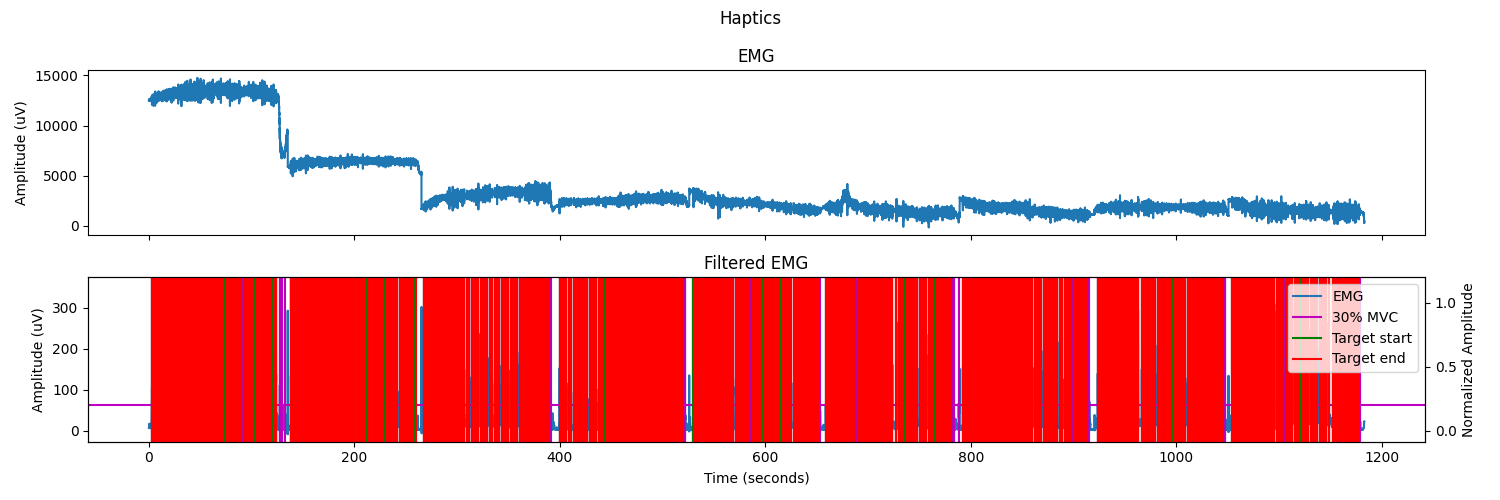

In [47]:
fig, axs = plt.subplots(2, figsize=(15, 5), sharex=True) # dont need status or lsl clock
fig.suptitle('Haptics')

axs[0].plot(data_timestamps_haptics, data_haptics[:, 0])
axs[0].title.set_text('EMG')

for xc in start_cue_timestamp_haptics:
    axs[1].axvline(x=xc, color='g')
for xc in stop_cue_timestamp_haptics:
    axs[1].axvline(x=xc, color='r')

axs[1].plot(data_timestamps_haptics, process_haptics.lpFilteredData, label='EMG')
axs[1].title.set_text('Filtered EMG')
axs[1].axhline(y=mvc_threshold, color='m', label='30% MVC')

for ups in data_crossed_small_haptics:
    axs[1].axvline(x=ups, color='m')

for xc in start_cue_timestamp_haptics:
    axs[1].axvline(x=xc, color='g', label='Target start')
for xc in stop_cue_timestamp_haptics:
    axs[1].axvline(x=xc, color='r', label='Target end')

    
axs[1].set_xlabel('Time (seconds)')
axs[1].set_ylabel('Amplitude (uV)')
axs[0].set_ylabel('Amplitude (uV)')
ax1_twin = axs[1].twinx()
ax1_twin.set_ylabel('Normalized Amplitude')

# set twin scale (convert degree celsius to fahrenheit)
Norm_amp = lambda amp: amp/Mvc
# get left axis limits
ymin, ymax = axs[1].get_ylim()
# apply function and set transformed values to right axis limits
ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax1_twin.plot([],[])

# plt.legend(loc="upper right", ncol=2)
legend_without_duplicate_labels(axs[1])

plt.setp(axs[0].get_xticklabels(), visible=False)
plt.tight_layout()
plt.show()

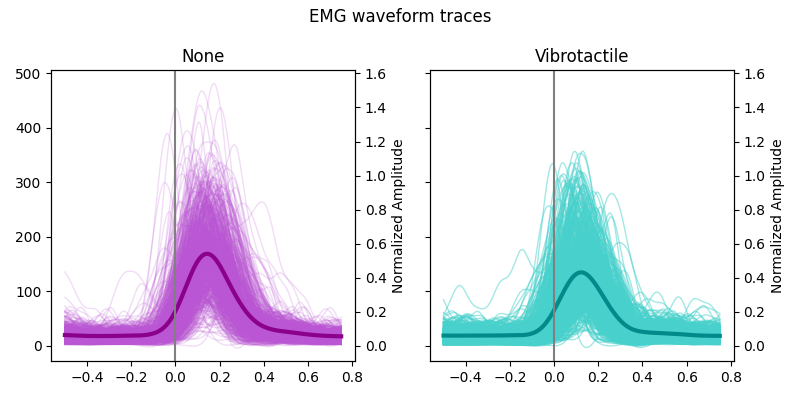

In [48]:
x_axis = (np.arange(5000) - 2000)/4000


fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
waveforms_wo = np.empty((np.shape(start_cue_wo)[0], 5000))
for idx, start in enumerate(start_cue_wo):
    waveforms_wo[idx] = process_wo.lpFilteredData[start-2000:start+3000]
    ax[0].plot(x_axis, process_wo.lpFilteredData[start-2000:start+3000], alpha=0.2, lw=1, color='mediumorchid')
np.savetxt('kriti_waveforms_wo.txt', waveforms_wo)

# print(np.shape(np.mean(waveforms, axis=0)))
ax[0].set_title('None')
ax[0].plot(x_axis, np.mean(waveforms_wo, axis=0), color ='darkmagenta', lw=3)
ax1_twin = ax[0].twinx()
ax1_twin.set_ylabel('Normalized Amplitude')


# set twin scale (convert degree celsius to fahrenheit)
Norm_amp = lambda amp: amp/Mvc
# get left axis limits
ymin, ymax = ax[0].get_ylim()
# apply function and set transformed values to right axis limits
ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax1_twin.plot([],[])

plt.axvline(x = 0, color='grey')



waveforms_haptics = np.empty((np.shape(start_cue_haptics)[0], 5000))
for idx, start in enumerate(start_cue_haptics):
    waveforms_haptics[idx] = process_haptics.lpFilteredData[start-2000:start+3000]
    ax[1].plot(x_axis, process_haptics.lpFilteredData[start-2000:start+3000], alpha=0.5, lw=1, color='mediumturquoise')
np.savetxt('kriti_waveforms_haptics.txt', waveforms_haptics)

# print(np.shape(np.mean(waveforms, axis=0)))
ax[1].plot(x_axis, np.mean(waveforms_haptics, axis=0), color ='darkcyan', lw=3)
ax[1].set_title('Vibrotactile')
ax1_twin = ax[1].twinx()
ax1_twin.set_ylabel('Normalized Amplitude')

# set twin scale (convert degree celsius to fahrenheit)
Norm_amp = lambda amp: amp/Mvc
# get left axis limits
ymin, ymax = ax[1].get_ylim()
# apply function and set transformed values to right axis limits
ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax1_twin.plot([],[])

plt.axvline(x = 0, color='grey')
plt.suptitle('EMG waveform traces')
plt.tight_layout()

Text(0.5, 1.0, 'Average (+std dev) EMG waveforms')

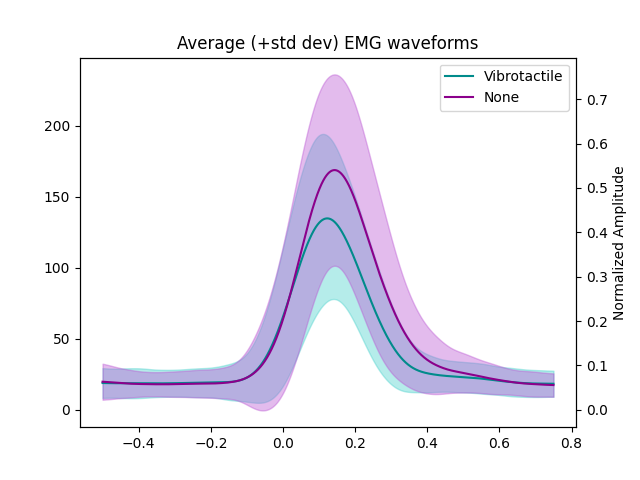

In [49]:
fig, ax = plt.subplots(1)
plt.plot(x_axis, np.mean(waveforms_haptics, axis=0), 'darkcyan', label='Vibrotactile')
plt.fill_between(x_axis, np.mean(waveforms_haptics, axis=0)-np.std(waveforms_haptics, axis=0), np.mean(waveforms_haptics, axis=0)+np.std(waveforms_haptics, axis=0), color='mediumturquoise', alpha=0.4)
plt.plot(x_axis, np.mean(waveforms_wo, axis=0), 'darkmagenta', label='None')
plt.fill_between(x_axis, np.mean(waveforms_wo, axis=0)-np.std(waveforms_wo, axis=0), np.mean(waveforms_wo, axis=0)+np.std(waveforms_wo, axis=0), color='mediumorchid', alpha=0.4)
plt.legend()

ax1_twin = ax.twinx()
ax1_twin.set_ylabel('Normalized Amplitude')

# set twin scale (convert degree celsius to fahrenheit)
Norm_amp = lambda amp: amp/Mvc
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax1_twin.plot([],[])
plt.title('Average (+std dev) EMG waveforms')

In [24]:

print(ID_haptics)

[3.4150375  2.73696559 3.87446912 2.79836614 2.12029423 3.25779776
 4.73696559 5.19639721 4.05889369 3.87446912 2.73696559 3.4150375
 2.79836614 3.25779776 2.12029423 4.05889369 4.73696559 5.19639721
 3.4150375  2.73696559 3.87446912 2.79836614 3.25779776 2.12029423
 4.73696559 5.19639721 4.05889369]


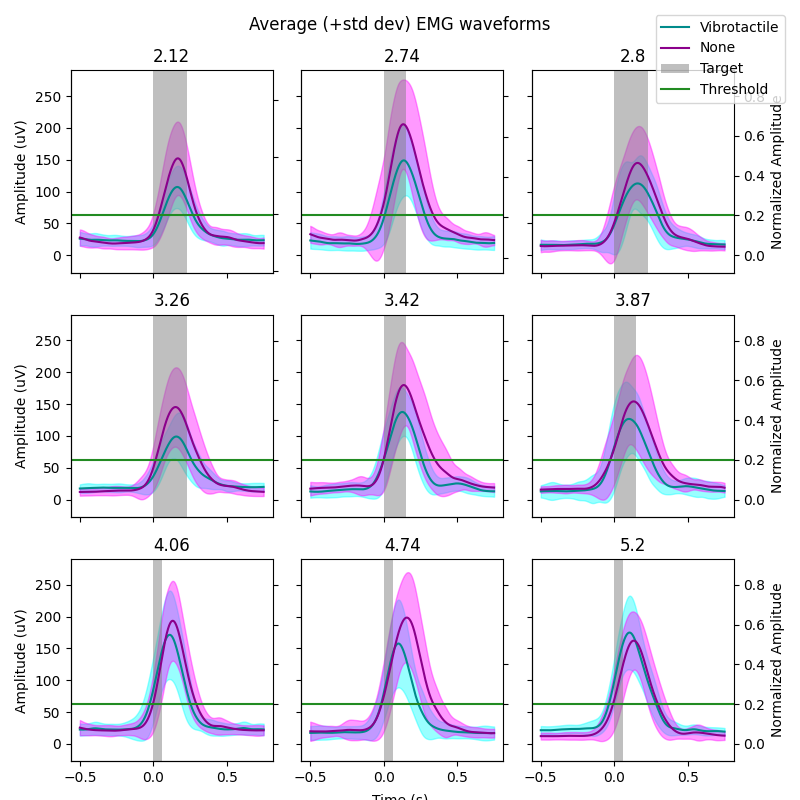

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(8, 8), sharex=True, sharey=True)
ax = ax.flatten()
ID_ordered = np.sort(ID_haptics)
for idx, the_ID in enumerate(ID_ordered[::3]):

    # print(the_ID)
    idx_haptics = np.argwhere(the_ID == ID_haptics)
    target_size = gui_combos_haptics[idx_haptics[0][0],0]
    # # print(idx_haptics)
    # atmp1 = waveforms_haptics[idx_haptics[0][0]*gui_reps_haptics:(idx_haptics[0][0]+1)*gui_reps_haptics-1]
    # atmp2 = waveforms_haptics[idx_haptics[1][0]*gui_reps_haptics:(idx_haptics[1][0]+1)*gui_reps_haptics-1]

    similar_waveforms = np.concatenate((waveforms_haptics[idx_haptics[0][0]*gui_reps_haptics:(idx_haptics[0][0]+1)*gui_reps_haptics-1], waveforms_haptics[idx_haptics[1][0]*gui_reps_haptics:(idx_haptics[1][0]+1)*gui_reps_haptics-1], waveforms_haptics[idx_haptics[2][0]*gui_reps_haptics:(idx_haptics[2][0]+1)*gui_reps_haptics-1])) 
    waveform_haptics_mean = np.mean(similar_waveforms, axis=0)
    waveform_haptics_std = np.std(similar_waveforms, axis=0)
    ax[idx].plot(x_axis, waveform_haptics_mean, 'darkcyan', label='Vibrotactile')
    ax[idx].fill_between(x_axis, waveform_haptics_mean-waveform_haptics_std,waveform_haptics_mean+waveform_haptics_std, color='cyan', alpha=0.4)

    idx_wo = np.argwhere(the_ID == ID_wo)
    # print(idx_wo)
    # print(idx_wo*gui_reps_haptics)
    # print((idx_wo+1)*gui_reps_haptics-1)
    similar_waveforms_wo = np.concatenate((waveforms_wo[idx_wo[0][0]*gui_reps_haptics:(idx_wo[0][0]+1)*gui_reps_haptics-1], waveforms_wo[idx_wo[1][0]*gui_reps_haptics:(idx_wo[1][0]+1)*gui_reps_haptics-1], waveforms_wo[idx_wo[2][0]*gui_reps_haptics:(idx_wo[2][0]+1)*gui_reps_haptics-1]))
    waveform_wo_mean = np.mean(similar_waveforms_wo, axis=0)
    waveform_wo_std = np.std(similar_waveforms_wo, axis=0)
    ax[idx].plot(x_axis, waveform_wo_mean, 'darkmagenta', label='None')
    ax[idx].fill_between(x_axis, waveform_wo_mean-waveform_wo_std, waveform_wo_mean+waveform_wo_std, color='magenta', alpha=0.4)

    # ax[idx].legend()
    ax[idx].axvspan(0, target_size/1000, alpha=0.5, color='grey', label='Target', lw=0)
    
    
    ax1_twin = ax[idx].twinx()
    ax1_twin.tick_params(labelright = False)  
    if idx % 3 == 2:
        ax1_twin.set_ylabel('Normalized Amplitude')
        ax1_twin.tick_params(labelright = True)

    if idx % 3 == 0:  
        ax[idx].set_ylabel('Amplitude (uV)')

    # set twin scale (convert degree celsius to fahrenheit)
    Norm_amp = lambda amp: amp/Mvc
    # get left axis limits
    ymin, ymax = ax[idx].get_ylim()
    # apply function and set transformed values to right axis limits
    ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
    # set an invisible artist to twin axes 
    # to prevent falling back to initial values on rescale events
    ax1_twin.plot([],[])
    plt.title(round(the_ID, 2))
    # plt.axvline(x = 0, color='grey')

    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].axhline(y=mvc_threshold, color='forestgreen',label='Threshold')


handles, labels = ax[8].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(*zip(*unique), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.suptitle('Average (+std dev) EMG waveforms')
fig.text(0.5, 0.0, 'Time (s)', ha='center', va='center')
plt.tight_layout()

# plt.savefig('waveforms_ID.png', dpi=500, bbox_inches="tight")
plt.show()

In [42]:
# Exclude the first pulse - that is ardunio power cycling
# start_cue_timestamp = start_cue_timestamp[1:] # [1:]
# stop_cue_timestamp = stop_cue_timestamp[1:] #[1:]

threshold_closest_timestamp_haptics = np.empty(np.size(start_cue_timestamp_haptics[:]))
threshold_closest_timestamp_haptics[:] = np.nan
correct_timestamp_haptics = np.empty(np.size(start_cue_timestamp_haptics[:]))
###for every value in the strt_cue 
for idx_cue, cue in enumerate(start_cue_timestamp_haptics[:]):

    after_start_timestamp = start_cue_timestamp_haptics[idx_cue] <= data_crossed_small_haptics
    before_stop_timestamp = data_crossed_small_haptics <= stop_cue_timestamp_haptics[idx_cue]
    # check if there is a value between start_cue and stop cue
    if np.any(np.logical_and(after_start_timestamp, before_stop_timestamp)):
        in_target = np.argwhere(np.logical_and(after_start_timestamp, before_stop_timestamp))
        closet_value = in_target[0]
        threshold_closest_timestamp_haptics[idx_cue] = data_crossed_small_haptics[in_target[0]]
        correct_timestamp_haptics[idx_cue] = True
    else:
        # if not - get closet 
        idx = (np.abs(data_crossed_small_haptics - start_cue_timestamp_haptics[idx_cue])).argmin()

        threshold_closest_timestamp_haptics[idx_cue] = data_crossed_small_haptics[idx]
        correct_timestamp_haptics[idx_cue] = False
         # get rid of values greater than half the distance between the next cue 

# print("closest:", threshold_closest_timestamp)
# print("correctness:", correct_timestamp)
np.savetxt('kriti_correctness_haptics.txt', correct_timestamp_haptics)

threshold_distance_timestamp_haptics = threshold_closest_timestamp_haptics - start_cue_timestamp_haptics
np.savetxt('kriti__threshold_distance_timestamp_haptics.txt', threshold_distance_timestamp_haptics)
# print("distance away:", threshold_distance_timestamp)


threshold_distance_timestamp_haptics[threshold_distance_timestamp_haptics > 0.5] = NaN
threshold_distance_timestamp_haptics[threshold_distance_timestamp_haptics < -0.5] = NaN
print("distance away:", threshold_distance_timestamp_haptics)

threshold_distance_timestamp_haptics_nan = threshold_distance_timestamp_haptics[~np.isnan(threshold_distance_timestamp_haptics)]

distance away: [ 1.27159602e-01  8.50000139e-03  3.22500053e-02  7.07551949e-02
  1.05866296e-01  4.00000066e-03  1.45128304e-01 -2.97500049e-02
 -5.42500089e-02 -1.33885903e-01  9.30591963e-02 -5.25000086e-03
 -1.46977853e-02 -5.35000088e-02 -1.00000016e-02 -1.60000026e-02
  9.25000152e-03 -4.04816892e-02  2.82500046e-02 -5.20000085e-02
 -8.40000138e-02 -4.50000074e-03 -5.46824894e-02  1.95000032e-02
  2.79355844e-02  2.27500037e-02 -7.44011897e-02 -4.45595883e-02
  1.52500025e-02  2.25000037e-03 -1.50000025e-02  1.37500023e-02
 -2.50000041e-02  4.25000070e-03 -5.68781918e-02  7.75000127e-03
  2.78899308e-01 -2.17500036e-02 -5.67206912e-02  1.47500024e-02
 -2.25000037e-03  4.33765918e-02  9.00000148e-03 -8.00000131e-03
  5.82500095e-02  8.05000132e-02  7.74242951e-02 -4.75000078e-03
 -1.00000016e-02 -5.25000086e-03 -6.76862942e-02 -5.65000093e-02
 -3.30407856e-02  2.55158489e-01  1.34459284e-01 -1.16685002e-01
 -3.65000060e-02  9.63267963e-02  1.25203784e-01 -3.67446855e-02
 -7.625001

In [43]:
threshold_closest_timestamp_wo = np.empty(np.size(start_cue_timestamp_wo[:]))
threshold_closest_timestamp_wo[:] = np.nan
correct_timestamp_wo = np.empty(np.size(start_cue_timestamp_wo[:]))
###for every value in the strt_cue 
for idx_cue, cue in enumerate(start_cue_timestamp_wo[:]):

    after_start_timestamp = start_cue_timestamp_wo[idx_cue] <= data_crossed_small_wo
    before_stop_timestamp = data_crossed_small_wo <= stop_cue_timestamp_wo[idx_cue]
    # check if there is a value between start_cue and stop cue
    if np.any(np.logical_and(after_start_timestamp, before_stop_timestamp)):
        in_target = np.argwhere(np.logical_and(after_start_timestamp, before_stop_timestamp))
        closet_value = in_target[0]
        threshold_closest_timestamp_wo[idx_cue] = data_crossed_small_wo[in_target[0]]
        correct_timestamp_wo[idx_cue] = True
    else:
        # if not - get closet 
        idx = (np.abs(data_crossed_small_wo - start_cue_timestamp_wo[idx_cue])).argmin()

        threshold_closest_timestamp_wo[idx_cue] = data_crossed_small_wo[idx]
        correct_timestamp_wo[idx_cue] = False
         # get rid of values greater than half the distance between the next cue 

# print("closest:", threshold_closest_timestamp)
# print("correctness:", correct_timestamp)
np.savetxt('kriti_correctness_wo.txt', correct_timestamp_wo)

threshold_distance_timestamp_wo = threshold_closest_timestamp_wo - start_cue_timestamp_wo
np.savetxt('kriti__threshold_distance_timestamp_wo.txt', threshold_distance_timestamp_wo)
# print("distance away:", threshold_distance_timestamp)


threshold_distance_timestamp_wo[threshold_distance_timestamp_wo > 0.5] = NaN
threshold_distance_timestamp_wo[threshold_distance_timestamp_wo < -0.5] = NaN
print("distance away:", threshold_distance_timestamp_wo)

threshold_distance_timestamp_wo_nan = threshold_distance_timestamp_wo[~np.isnan(threshold_distance_timestamp_wo)]

distance away: [-2.20000036e-02  6.75000111e-03 -2.42500040e-02 -3.85860878e-02
  5.92500097e-02  5.69843914e-02 -1.62500027e-02  1.17500019e-02
  1.65000027e-02  5.42500089e-02 -1.47500024e-02 -1.05767841e-02
  1.50000025e-02  3.57500059e-02  5.27797879e-02  2.62500043e-02
  3.70000061e-02 -2.37500039e-02 -6.19582951e-02 -1.07500018e-02
 -1.65000027e-02  3.82189885e-02  5.62500092e-02 -3.08892885e-02
  1.65000027e-02 -4.45000073e-02 -2.60000043e-02 -2.45000040e-02
 -3.92500064e-02  3.51338882e-02  5.29702930e-02  4.15000068e-02
  4.71750892e-02 -5.37784885e-02 -2.75000045e-03  6.75000111e-03
 -4.00100884e-02 -5.52457895e-02 -6.22500102e-02 -1.40000023e-02
  3.20212875e-02  2.32500038e-02  3.62500059e-02  4.52500074e-02
 -4.13083122e-04  4.45000073e-02  8.02500132e-02  2.52927842e-02
 -2.50000041e-04  2.82500046e-02  1.70000028e-02 -9.77500160e-02
 -2.72500045e-02  1.60000026e-02  2.77500045e-02  2.50000041e-04
 -6.15000101e-02  1.28808905e-01  1.15000019e-02  6.75000111e-03
  2.400000

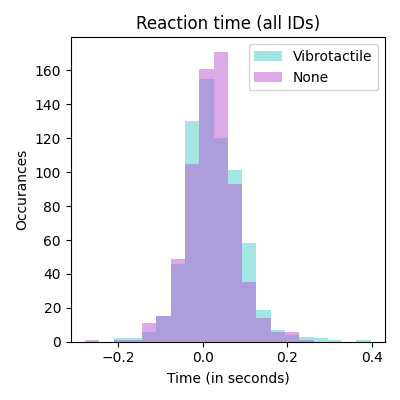

In [28]:
bins = np.histogram(np.hstack((threshold_distance_timestamp_haptics_nan, threshold_distance_timestamp_wo_nan)), bins=20)[1]

plt.figure(figsize=(4,4))
plt.hist(threshold_distance_timestamp_haptics, bins=bins, alpha=0.5, label='Vibrotactile', color='mediumturquoise')
plt.hist(threshold_distance_timestamp_wo, bins=bins, alpha=0.5, label='None', color='mediumorchid')
plt.title('Reaction time (all IDs)')
plt.xlabel('Time (in seconds)')
plt.ylabel('Occurances')
plt.legend()
plt.tight_layout()
plt.savefig('reactiontime_hist.png', dpi=500, bbox_inches="tight")
plt.show()

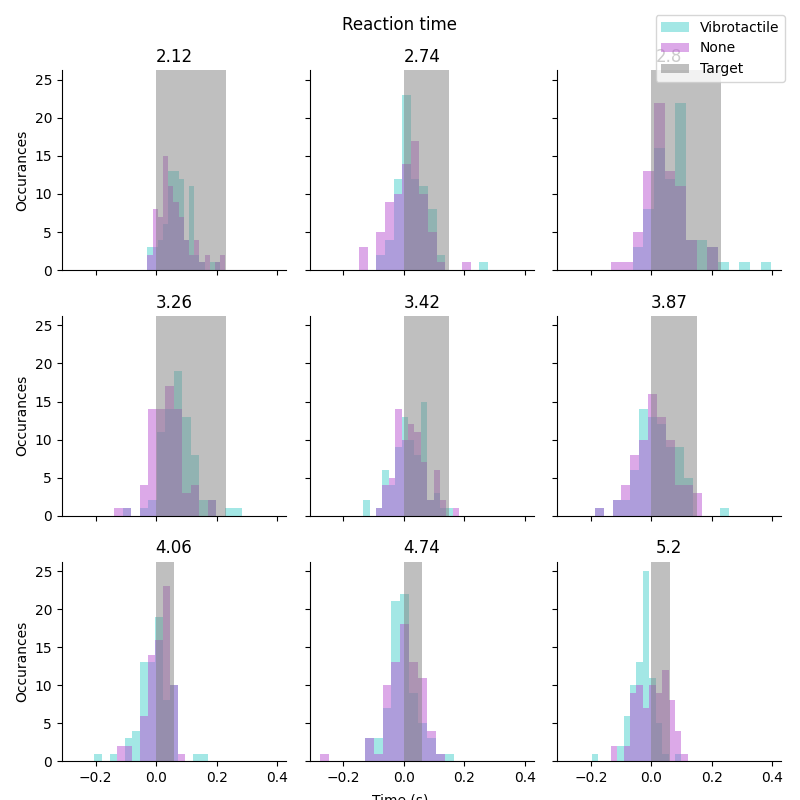

In [29]:
fig, ax = plt.subplots(3, 3, figsize=(8, 8), sharex=True, sharey=True)
ax = ax.flatten()
ID_ordered = np.sort(ID_haptics)
for idx, the_ID in enumerate(ID_ordered[::3]):

    # print(the_ID)
    idx_haptics = np.argwhere(the_ID == ID_haptics)
    idx_wo = np.argwhere(the_ID == ID_wo)
    target_size = gui_combos_haptics[idx_haptics[0][0],0]
    
    hist1 = threshold_distance_timestamp_haptics[idx_haptics[0][0]*gui_reps_haptics:(idx_haptics[0][0]+1)*gui_reps_haptics]
    hist2 = threshold_distance_timestamp_haptics[idx_haptics[1][0]*gui_reps_haptics:(idx_haptics[1][0]+1)*gui_reps_haptics]
    hist3 = threshold_distance_timestamp_haptics[idx_haptics[2][0]*gui_reps_haptics:(idx_haptics[2][0]+1)*gui_reps_haptics]
    
    similar_hists_haptics = np.concatenate((hist1, hist2, hist3))
    similar_hists_wo = np.concatenate((threshold_distance_timestamp_wo[idx_wo[0][0]*gui_reps_haptics:(idx_wo[0][0]+1)*gui_reps_haptics], threshold_distance_timestamp_wo[idx_wo[1][0]*gui_reps_haptics:(idx_wo[1][0]+1)*gui_reps_haptics], threshold_distance_timestamp_wo[idx_wo[2][0]*gui_reps_haptics:(idx_wo[2][0]+1)*gui_reps_haptics]))
    
    bins = np.histogram(np.hstack((similar_hists_haptics[~np.isnan(similar_hists_haptics)], similar_hists_wo[~np.isnan(similar_hists_wo)])), bins=15)[1]

    
    ax[idx].hist(similar_hists_haptics, bins=bins, alpha=0.5, label='Vibrotactile', color='mediumturquoise')
    ax[idx].hist(similar_hists_wo, bins=bins, alpha=0.5, label='None', color='mediumorchid')

    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].axvspan(0, target_size/1000, alpha=0.5, color='grey', label='Target', lw=0)
    ax[idx].set_title(round(the_ID, 2))
    if idx % 3 == 0:  
        ax[idx].set_ylabel('Occurances')

handles, labels = ax[8].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(*zip(*unique), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.suptitle('Reaction time')
fig.text(0.5, 0.0, 'Time (s)', ha='center', va='center')
plt.tight_layout()

plt.savefig('reaction_time_ID_kriti.png', dpi=500, bbox_inches="tight")
plt.show()
    

In [30]:
ID_ordered

array([2.12029423, 2.12029423, 2.12029423, 2.73696559, 2.73696559,
       2.73696559, 2.79836614, 2.79836614, 2.79836614, 3.25779776,
       3.25779776, 3.25779776, 3.4150375 , 3.4150375 , 3.4150375 ,
       3.87446912, 3.87446912, 3.87446912, 4.05889369, 4.05889369,
       4.05889369, 4.73696559, 4.73696559, 4.73696559, 5.19639721,
       5.19639721, 5.19639721])

In [31]:
ID_haptics

array([3.4150375 , 2.73696559, 3.87446912, 2.79836614, 2.12029423,
       3.25779776, 4.73696559, 5.19639721, 4.05889369, 3.87446912,
       2.73696559, 3.4150375 , 2.79836614, 3.25779776, 2.12029423,
       4.05889369, 4.73696559, 5.19639721, 3.4150375 , 2.73696559,
       3.87446912, 2.79836614, 3.25779776, 2.12029423, 4.73696559,
       5.19639721, 4.05889369])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
24
49
74
99
124
149
174
199
224
249
274
299
324
349
374
399
424
449
474
499
524
549
574
599
624
649
674


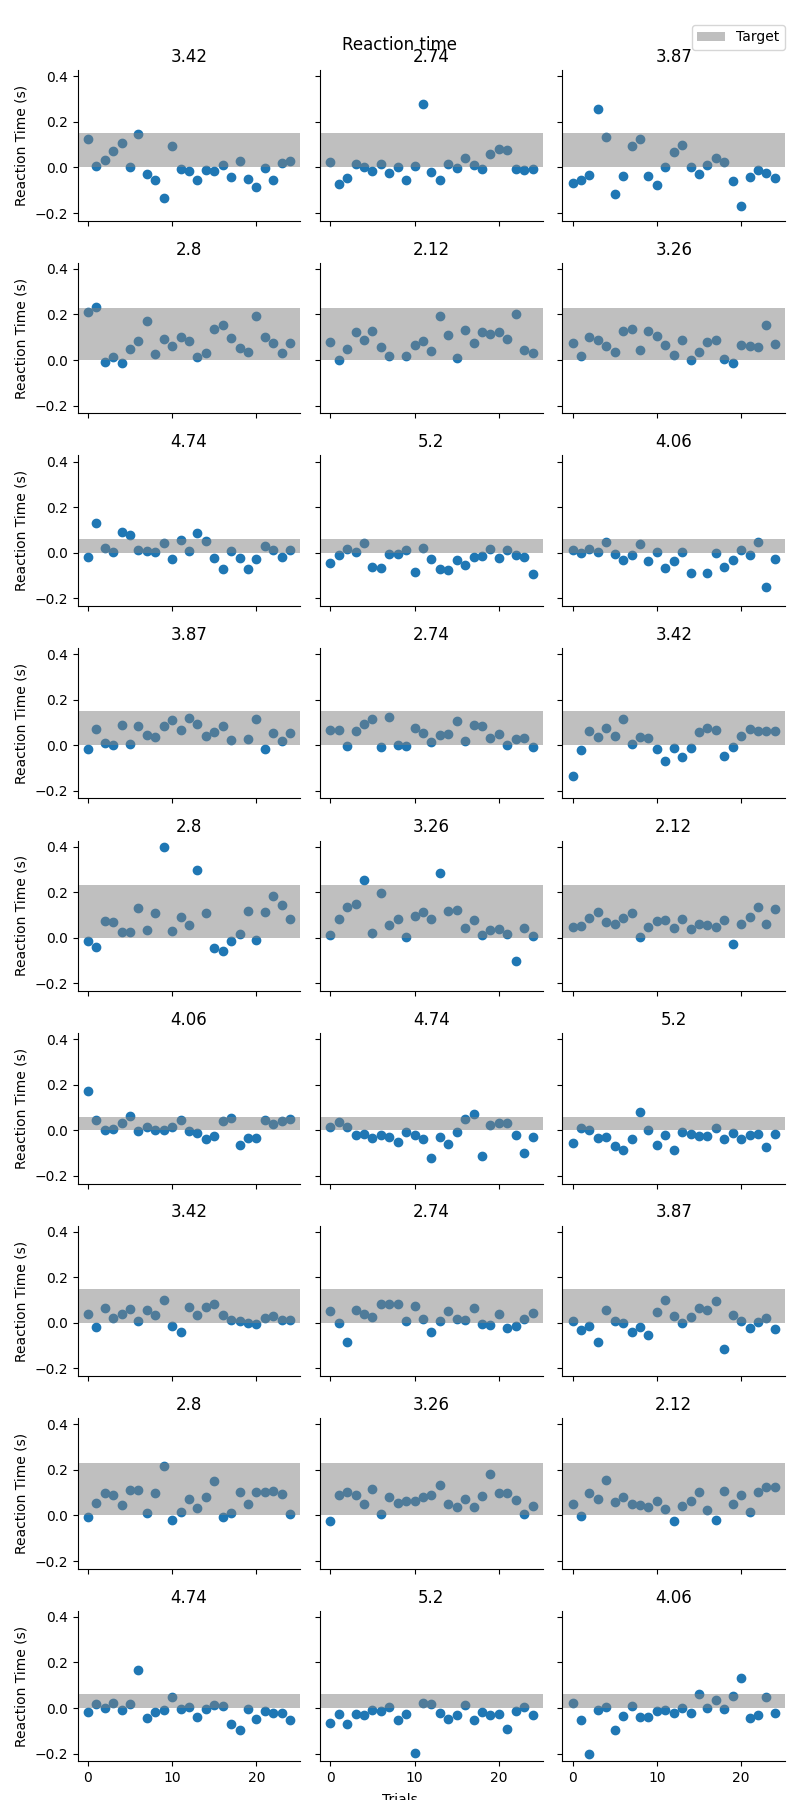

In [32]:
fig, ax = plt.subplots(9, 3, figsize=(8, 18), sharex=True, sharey=True)
ax = ax.flatten()
x_range = np.arange(gui_reps_haptics)
print(x_range)
# ID_ordered = np.sort(ID_haptics)
for idx, the_ID in enumerate(ID_haptics):
    # print(idx)
    target_size = gui_combos_haptics[idx,0]
    print((idx+1)*gui_reps_haptics-1)
    scatter1 = threshold_distance_timestamp_haptics[idx*gui_reps_haptics:(idx+1)*gui_reps_haptics]
    # print(scatter1)
    ax[idx].scatter(x_range, scatter1)


    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].axhspan(0, target_size/1000, alpha=0.5, color='grey', label='Target', lw=0)
    ax[idx].set_title(round(the_ID, 2))
    if idx % 3 == 0:  
        ax[idx].set_ylabel('Reaction Time (s)')

handles, labels = ax[8].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(*zip(*unique), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.suptitle('Reaction time')
fig.text(0.5, 0.0, 'Trials', ha='center', va='center')
plt.tight_layout()

# plt.savefig('reaction_time_ID_kriti.png', dpi=500, bbox_inches="tight")
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


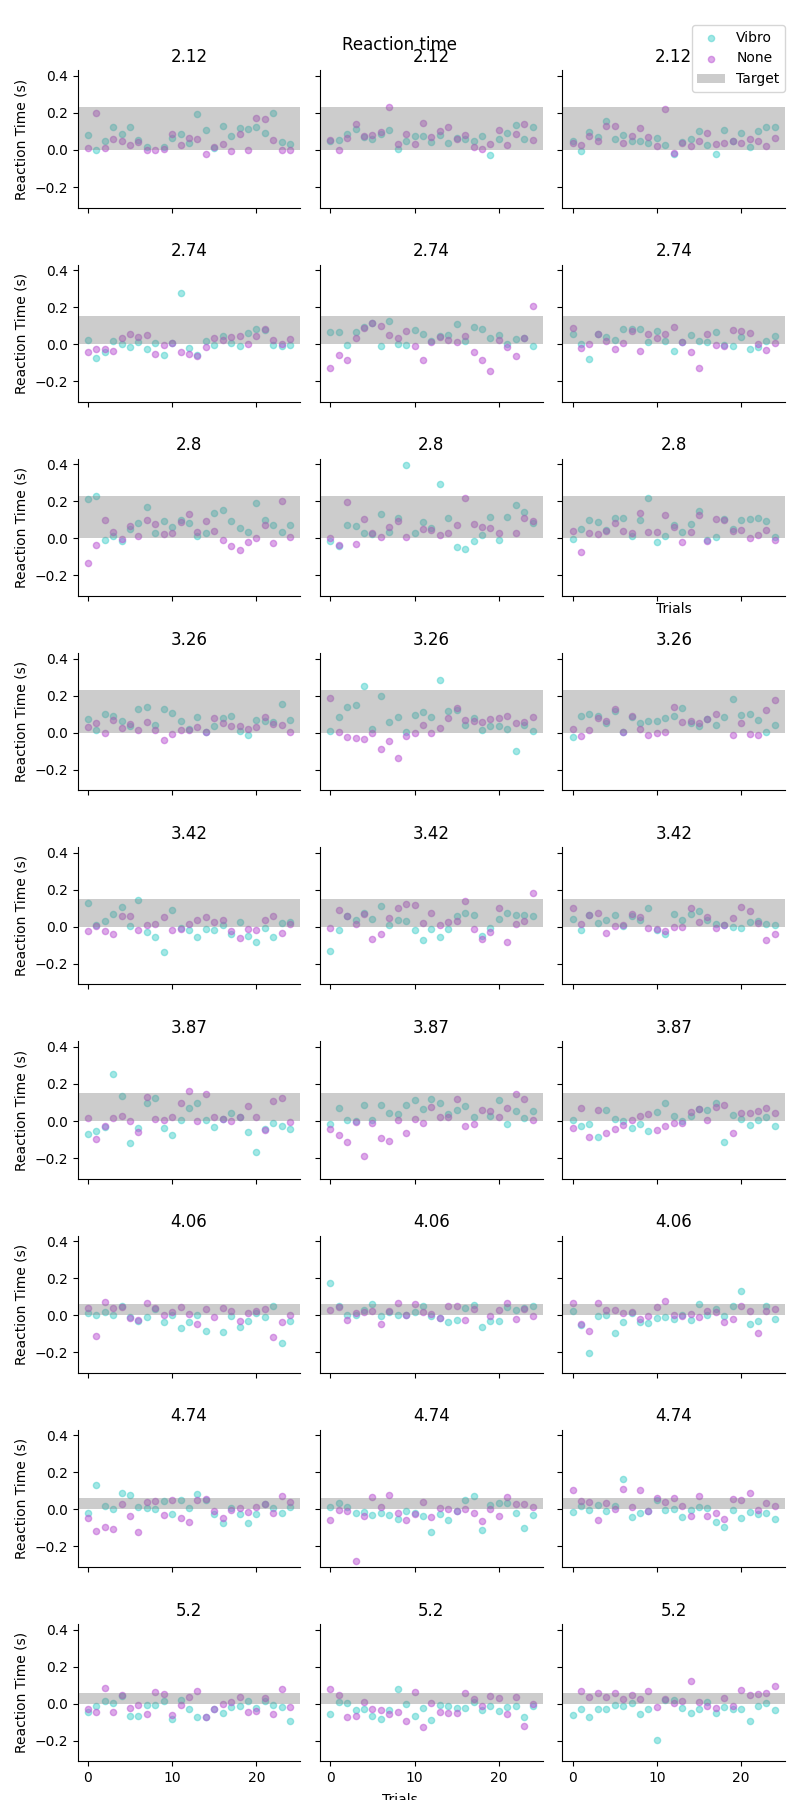

In [33]:
fig, ax = plt.subplots(9, 3, figsize=(8, 18), sharex=True, sharey=True)
ax = ax.flatten()
ID_ordered = np.sort(ID_haptics)
x_range = np.arange(gui_reps_haptics)
print(x_range)
# ID_ordered = np.sort(ID_haptics)
for idx, the_ID in enumerate(ID_ordered[::3]):
    # print(idx)
    # print(the_ID)
    idx_haptics = np.argwhere(the_ID == ID_haptics)
    idx_wo = np.argwhere(the_ID == ID_wo)

    target_size = gui_combos_haptics[idx_haptics[0][0],0]
    scatter1 = threshold_distance_timestamp_haptics[idx*gui_reps_haptics:(idx+1)*gui_reps_haptics]
    # print(scatter1)

    scatter1 = threshold_distance_timestamp_haptics[idx_haptics[0][0]*gui_reps_haptics:(idx_haptics[0][0]+1)*gui_reps_haptics]
    scatter2 = threshold_distance_timestamp_haptics[idx_haptics[1][0]*gui_reps_haptics:(idx_haptics[1][0]+1)*gui_reps_haptics]
    scatter3 = threshold_distance_timestamp_haptics[idx_haptics[2][0]*gui_reps_haptics:(idx_haptics[2][0]+1)*gui_reps_haptics]

    scatter1_wo = threshold_distance_timestamp_wo[idx_wo[0][0]*gui_reps_haptics:(idx_wo[0][0]+1)*gui_reps_haptics] 
    scatter2_wo = threshold_distance_timestamp_wo[idx_wo[1][0]*gui_reps_haptics:(idx_wo[1][0]+1)*gui_reps_haptics]
    scatter3_wo =threshold_distance_timestamp_wo[idx_wo[2][0]*gui_reps_haptics:(idx_wo[2][0]+1)*gui_reps_haptics]
    

    ax[idx*3].scatter(x_range, scatter1, color='mediumturquoise', label='Vibro', alpha=0.5, s=20)
    ax[idx*3+1].scatter(x_range, scatter2, color='mediumturquoise', label='Vibro', alpha=0.5, s=20)
    ax[idx*3+2].scatter(x_range, scatter3, color='mediumturquoise', label='Vibro', alpha=0.5, s=20)

    ax[idx*3].scatter(x_range, scatter1_wo, color='mediumorchid', label='None', alpha=0.5, s=20)
    ax[idx*3+1].scatter(x_range, scatter2_wo, color='mediumorchid', label='None', alpha=0.5, s=20)
    ax[idx*3+2].scatter(x_range, scatter3_wo, color='mediumorchid', label='None', alpha=0.5, s=20)


    ax[idx*3].spines['top'].set_visible(False)
    ax[idx*3+1].spines['top'].set_visible(False)
    ax[idx*3+2].spines['top'].set_visible(False)
    ax[idx*3].spines['right'].set_visible(False)
    ax[idx*3+1].spines['right'].set_visible(False)
    ax[idx*3+2].spines['right'].set_visible(False)

    ax[idx*3].axhspan(0, target_size/1000, alpha=0.4, color='grey', label='Target', lw=0)
    ax[idx*3].set_title(round(the_ID, 2))
    ax[idx*3+1].axhspan(0, target_size/1000, alpha=0.4, color='grey', label='Target', lw=0)
    ax[idx*3+1].set_title(round(the_ID, 2))
    ax[idx*3+2].axhspan(0, target_size/1000, alpha=0.4, color='grey', label='Target', lw=0)
    ax[idx*3+2].set_title(round(the_ID, 2))

  
    ax[idx*3].set_ylabel('Reaction Time (s)')

ax[idx].set_xlabel('Trials')
handles, labels = ax[8].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(*zip(*unique), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.suptitle('Reaction time')
fig.text(0.5, 0.0, 'Trials', ha='center', va='center')
plt.tight_layout()

plt.savefig('reaction_time_ID_learning_kriti.png', dpi=500, bbox_inches="tight")
plt.show()

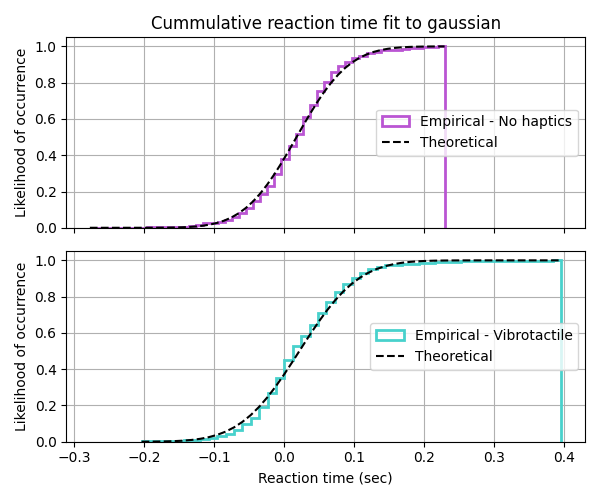

In [34]:
mu_wo = np.mean(threshold_distance_timestamp_wo_nan)
sigma_wo = np.std(threshold_distance_timestamp_wo_nan)
n_bins_wo = 50

fig, ax = plt.subplots(2, figsize=(6, 5), sharex=True, sharey=True)

# plot the cumulative histogram
n_wo, bins_wo, patches_wo = ax[0].hist(threshold_distance_timestamp_wo_nan, n_bins_wo, density=1, histtype='step',
                           cumulative=True, label='Empirical - No haptics', color='mediumorchid', linewidth=2)

# Add a line showing the expected distribution.
y = stats.norm.pdf(bins_wo, mu_wo, sigma_wo).cumsum()
y /= y[-1]

ax[0].plot(bins_wo, y, 'k--', linewidth=1.5, label='Theoretical')


ax[0].grid(True)
ax[0].legend(loc='right')
ax[0].set_title('Cummulative reaction time fit to gaussian')
ax[0].set_ylabel('Likelihood of occurrence')



## Haptics
mu_haptics = np.mean(threshold_distance_timestamp_haptics_nan)
sigma_haptics = np.std(threshold_distance_timestamp_haptics_nan)
n_bins_haptics = 50

# plot the cumulative histogram
n_haptics, bins_haptics, patches_haptics = ax[1].hist(threshold_distance_timestamp_haptics_nan, n_bins_haptics, density=1, histtype='step',
                           cumulative=True, label='Empirical - Vibrotactile', color='mediumturquoise', linewidth=2)

# Add a line showing the expected distribution.
y = stats.norm.pdf(bins_haptics, mu_haptics, sigma_haptics).cumsum()
y /= y[-1]

ax[1].plot(bins_haptics, y, 'k--', linewidth=1.5, label='Theoretical')


ax[1].grid(True)
ax[1].legend(loc='right')
ax[1].set_xlabel('Reaction time (sec)')
ax[1].set_ylabel('Likelihood of occurrence')

plt.tight_layout()

plt.show()

In [35]:
repitions = gui_reps_haptics
print("repitions:", repitions)
correct_timestamp_haptics = correct_timestamp_haptics[:-1]
level = np.arange(len(correct_timestamp_haptics))//repitions
print('Levels:', level)




performance_haptics = np.bincount(level,correct_timestamp_haptics)/np.bincount(level)
print('performance per level:', performance_haptics)
np.savetxt('kriti_haptics.txt', performance_haptics)
np.savetxt('kriti_ID_haptics.txt', ID_haptics)

repitions: 25
Levels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 1

In [36]:

repitions = gui_reps_wo
print("repitions:", repitions)
correct_timestamp_wo = correct_timestamp_wo[:-1]
level = np.arange(len(correct_timestamp_wo))//repitions
print('Levels:', level)




performance_wo = np.bincount(level,correct_timestamp_wo)/np.bincount(level)
print('performance per level:', performance_wo)
np.savetxt('kriti_wo.txt', performance_wo)
np.savetxt('kriti_ID_wo.txt', ID_wo)

repitions: 25
Levels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 1

0.8168927333643888
0.7718639676179523


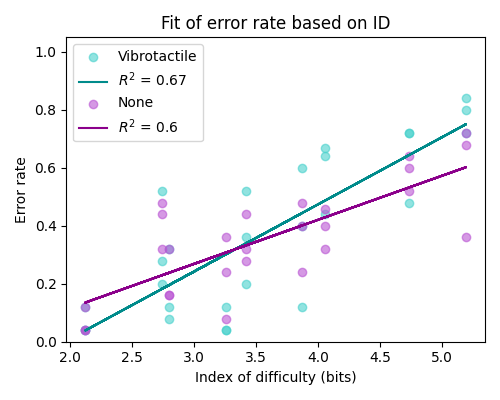

In [37]:
coef = np.polyfit(ID_haptics,1-performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(ID_haptics,1-performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(ID_wo,1-performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(ID_wo,1-performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(ID_haptics, 1-performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(ID_haptics, ID_fit_haptics(ID_haptics), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(ID_wo, 1-performance_wo, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(ID_wo, ID_fit_wo(ID_wo), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of error rate based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylabel('Error rate')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('errorrate_ID_kriti.png', dpi=500, bbox_inches="tight")
plt.show()

[6.79012346e-05 2.67160494e-01]
0.12581848945652352
[8.71913580e-05 2.16728395e-01]
0.23265885092770275


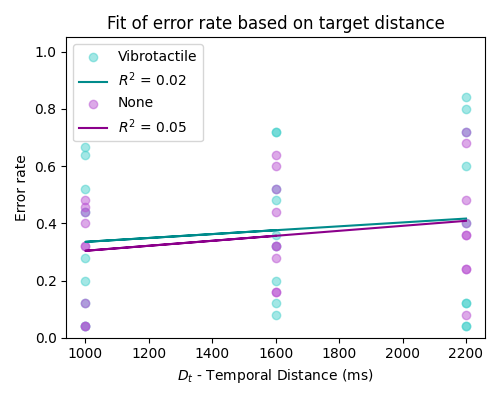

In [38]:

dt_coef_haptics = np.polyfit(gui_combos_haptics[:,1],1-performance_haptics,1)
print(dt_coef_haptics)
dt_fn_haptics = np.poly1d(dt_coef_haptics) 
r_value_haptics = stats.linregress(gui_combos_haptics[:,1],1-performance_haptics)[2]
print(r_value_haptics)


dt_coef_wo = np.polyfit(gui_combos_wo[:,1],1-performance_wo,1)
print(dt_coef_wo)
dt_fn_wo = np.poly1d(dt_coef_wo) 
r_value_wo = stats.linregress(gui_combos_wo[:,1],1-performance_wo)[2]
print(r_value_wo) 

plt.figure(figsize=(5,4))
plt.scatter(gui_combos_haptics[:,1], 1-performance_haptics[0:np.shape(ID_haptics)[0]], alpha=0.5, label="Vibrotactile", color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(gui_combos_haptics[:, 1][0:3], dt_fn_haptics(gui_combos_haptics[:, 1][0:3]), color='darkcyan', label=label_str_haptics)


plt.scatter(gui_combos_wo[:,1], 1-performance_wo[0:np.shape(ID_wo)[0]], alpha=0.5,  label="None", color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(gui_combos_wo[:, 1][0:3], dt_fn_wo(gui_combos_wo[:, 1][0:3]),color='darkmagenta', label=label_string_wo)


plt.title('Fit of error rate based on target distance')
plt.xlabel('$D_{t}$ - Temporal Distance (ms)')
plt.ylabel('Error rate')
plt.ylim([0, 1.05])
plt.legend()
plt.tight_layout()
plt.savefig('errorrate_distance_kriti.png', dpi=500, bbox_inches="tight")
plt.show()

[-0.0020675   0.65946834]
-0.7820063357766287
[-0.00334084  0.8657928 ]
-0.8774873642908045


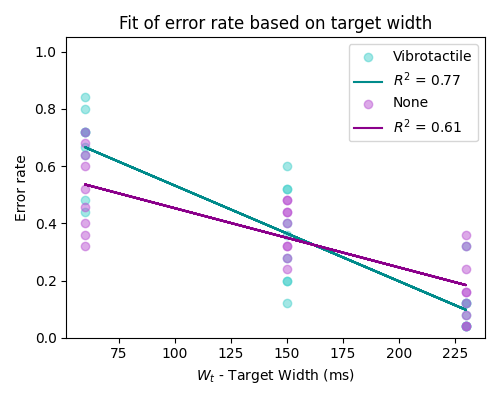

In [39]:
wt_coef_wo = np.polyfit(gui_combos_wo[:,0],1-performance_wo,1)
print(wt_coef_wo)
wt_wo = np.poly1d(wt_coef_wo)
r_value_wo = stats.linregress(gui_combos_wo[:,0],1-performance_wo)[2]
print(r_value_wo) 

wt_coef_haptics = np.polyfit(gui_combos_haptics[:,0],1-performance_haptics,1)
print(wt_coef_haptics)
wt_haptics = np.poly1d(wt_coef_haptics) 
r_value_haptics = stats.linregress(gui_combos_haptics[:,0],1-performance_haptics)[2]
print(r_value_haptics)

plt.figure(figsize=(5,4))
plt.scatter(gui_combos_haptics[:,0], 1-performance_haptics[0:np.shape(ID_haptics)[0]], alpha=0.5, color='mediumturquoise', label='Vibrotactile')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(gui_combos_haptics[:, 0][0:-1:3], wt_haptics(gui_combos_haptics[:, 0][0:-1:3]), color='darkcyan', label=label_str_haptics)

plt.scatter(gui_combos_wo[:,0], 1-performance_wo[0:np.shape(ID_wo)[0]], alpha=0.5,  label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(gui_combos_wo[:, 0][0:-1:3], wt_wo(gui_combos_wo[:, 0][0:-1:3]),color='darkmagenta', label=label_string_wo)

plt.title('Fit of error rate based on target width')
plt.xlabel('$W_{t}$ - Target Width (ms)')
plt.ylabel('Error rate')
plt.ylim([0, 1.05])
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('errorrate_width_kriti.png', dpi=500, bbox_inches="tight")

In [40]:
np.shape(box_plot_data_wo)

NameError: name 'box_plot_data_wo' is not defined

In [ ]:
threshold_distance_timestamp_wo =threshold_distance_timestamp_wo[:-1]

In [ ]:
ID_wo

In [ ]:
ID_wo_rep = np.repeat(ID_wo, 25)
print(ID_wo_rep)

In [ ]:
np.unique(ID_wo_rep, return_index=True)[1][1:]

In [ ]:
np.unique(level, return_index=True)[1][1:]

In [ ]:
np.shape(box_plot_data_haptics)

In [ ]:
box_plot_data_haptics = np.split(threshold_distance_timestamp_haptics, np.unique(level, return_index=True)[1][1:])
bar_mean_haptics = np.nanmean(box_plot_data_haptics, axis=1)
print('Vibro mean:', bar_mean_haptics)
bar_std_haptics = np.nanstd(box_plot_data_haptics, axis=1)
print('Vibro std:', bar_std_haptics)

box_plot_data_wo = np.split(threshold_distance_timestamp_wo, np.unique(level, return_index=True)[1][1:])
bar_mean_wo = np.nanmean(box_plot_data_wo, axis=1)
print('None mean:', bar_mean_wo)
bar_std_wo = np.nanstd(box_plot_data_wo, axis=1)
print('None std:', bar_std_wo)

plt.figure(figsize=(8,3))
ax = plt.subplot(111)
w = 0.05
x= np.arange(np.shape(bar_mean_wo)[0])
ax.bar(ID_wo-w/2, bar_mean_wo, yerr=bar_std_wo, width=w, color='mediumorchid', align='center', label='None')
ax.bar(ID_haptics+w/2, bar_mean_haptics,yerr=bar_std_haptics, width=w, color='mediumturquoise', align='center', label='Vibrotactile')
plt.legend()
plt.title('Reaction time per ID')
plt.ylabel('Time (in seconds)')
plt.xlabel('Index of Difficulty (bits)')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig('reactiontime_ID_kriti.png', dpi=500, bbox_inches="tight")
plt.show()